# *대전시 CCTV 현황 분석*

* 대전시 CCTV에 대한 전반적인 현황을 분석한다.

In [1]:
%matplotlib inline

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set()

In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams[ 'axes.unicode_minus' ] = False

if platform.system() == 'Darwin':
    rc( 'font', family = 'AppleGothic' )
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/gulim.ttc'
    font_name = font_manager.FontProperties( fname = path ).get_name()
    rc( 'font', family = font_name )
else:
    prit( 'Unknown system...' )

## 1. 데이터 읽기 및 DataFrame 생성

In [3]:
daejeon_daedouk_cctv = pd.read_csv( '대전광역시_대덕구_CCTV_20190331.csv', encoding = 'euc-kr' )
daejeon_daedouk_cctv.head()

관리기관명                 소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  \
0  대전광역시 대덕구청    대전광역시 대덕구 비래서로61번길 35   대전광역시 대덕구 비래동 138-4   생활방범      1   
1  대전광역시 대덕구청  대전광역시 대덕구 옛신탄진로151번길 11  대전광역시 대덕구 오정동 435-14   생활방범      1   
2  대전광역시 대덕구청   대전광역시 대덕구 대전로1066번길 35  대전광역시 대덕구 오정동 441-12   생활방범      2   
3  대전광역시 대덕구청    대전광역시 대덕구 중리남로27번길 11   대전광역시 대덕구 중리동 195-1   생활방범      1   
4  대전광역시 대덕구청        대전광역시 대덕구 중리남로 45   대전광역시 대덕구 중리동 207-2   생활방범      1   

   카메라화소수 촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0     240    NaN  30.0  2008-08  042-608-6097  36.355991  127.452253   
1     240    NaN  30.0  2008-08  042-608-6097  36.352678  127.417440   
2     240    NaN  30.0  2018-08  042-608-6097  36.350281  127.417418   
3     240    NaN  30.0  2008-08  042-608-6097  36.360539  127.428727   
4     240    NaN  30.0  2008-08  042-608-6097  36.360795  127.426761   

      데이터기준일자  
0  2019-03-31  
1  2019-03-31  
2  2019-03-31  
3  2019-03-31  
4  2019-03-31

In [4]:
daejeon_dong_cctv = pd.read_csv( '대전광역시_동구_CCTV_20190321.csv', encoding = 'euc-kr')
daejeon_dong_cctv.head()

관리기관명                     소재지도로명주소 소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  대전광역시 동구   대전광역시 동구  계족로446번길 19(용전동)     NaN   생활방범      1     200   
1  대전광역시 동구        대전광역시 동구 계족로 459(용전동)     NaN   생활방범      1     200   
2  대전광역시 동구  대전광역시 동구 동서대로1678번길 38(성남동)     NaN   생활방범      1     200   
3  대전광역시 동구      대전광역시 동구 한남로7번길 22(홍도동)     NaN   생활방범      1     200   
4  대전광역시 동구        대전광역시 동구 태전로 146(삼성동)     NaN   생활방범      1     200   

   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0     NaN    30  2008-08  042-251-4173  36.351339  127.433575  2019-03-21  
1     NaN    30  2008-08  042-251-4173  36.352627  127.431277  2019-03-21  
2     NaN    30  2008-08  042-251-4173  36.347003  127.436489  2019-03-21  
3     NaN    30  2008-08  042-251-4173  36.350232  127.427749  2019-03-21  
4     NaN    30  2008-08  042-251-4173  36.340992  127.420782  2019-03-21

In [5]:
daejeon_seo_cctv = pd.read_csv( '대전광역시_서구_CCTV_20190106.csv', encoding = 'euc-kr' )
daejeon_seo_cctv.head()

관리기관명                    소재지도로명주소                      소재지지번주소 설치목적구분  \
0  대전광역시 서구청       대전광역시 서구 오량1길 40(복수동)  대전광역시 서구 복수동 283-38 해피플러스 앞  쓰레기단속   
1  대전광역시 서구청       대전광역시 서구 복수동 781(복수동)     대전광역시 서구 복수동 781 공영주차장 옆  쓰레기단속   
2  대전광역시 서구청    대전광역시 서구 복수동로 96-19(복수동)      대전광역시 서구 복수동 812 해운빌딩 옆  쓰레기단속   
3  대전광역시 서구청   대전광역시 서구 복수동로88번길 20(복수동)     대전광역시 서구 복수동 762 해피하우스 옆  쓰레기단속   
4  대전광역시 서구청  대전광역시 서구 복수동로52번길 140(복수동)     대전광역시 서구 복수동 556 에메니티빌 앞  쓰레기단속   

   카메라대수  카메라화소수 촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0      1     NaN    NaN     5  2017-11  042-288-3574  36.310448  127.375772   
1      1     NaN    NaN     5  2018-05  042-288-3574  36.297749  127.378139   
2      1     NaN    NaN     5  2018-05  042-288-3574  36.296489  127.376259   
3      1     NaN    NaN     5  2018-05  042-288-3574  36.297309  127.376582   
4      1     NaN    NaN     5  2018-05  042-288-3574  36.299706  127.374451   

      데이터기준일자  
0  2019-01-04  
1  2019-01-04  
2  2019-01-04  
3  2019-01-04  
4  2019-01-04

In [6]:
daejeon_yusung_cctv = pd.read_csv( '대전광역시_유성구_CCTV_20190520_2.csv', encoding = 'cp949' )
daejeon_yusung_cctv.head()

관리기관명  소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  카메라화소수 촬영방면정보  보관일수  \
0  유성구청       NaN  대전광역시 유성구 구암동 598-1   생활방범      1     200   360°    30   
1  유성구청       NaN  대전광역시 유성구 구암동 619-1   생활방범      1     200   360°    30   
2  유성구청       NaN  대전광역시 유성구 장대동 317-5   생활방범      1     200   360°    30   
3  유성구청       NaN    대전광역시 유성구 궁동 1-11   생활방범      1     200   360°    30   
4  유성구청       NaN   대전광역시 유성구 궁동 417-7   생활방범      1     200   360°    30   

     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0  Feb-08  042-611-2114  36.353779  127.332868  2019-05-20  
1  Feb-08  042-611-2114  36.350180  127.331511  2019-05-20  
2  Feb-08  042-611-2114  36.364591  127.339741  2019-05-20  
3  Feb-08  042-611-2114  36.363951  127.352044  2019-05-20  
4  Feb-08  042-611-2114  36.361459  127.347978  2019-05-20

In [7]:
daejeon_jung_cctv = pd.read_csv( '대전광역시_중구_CCTV_20190527.csv', encoding = 'euc-kr' )
daejeon_jung_cctv.head()

관리기관명                 소재지도로명주소           소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  대전광역시 중구청  대전광역시 중구 대종로199번길41(호동)  대전광역시 중구 호동240-9   생활방범      1     200   
1  대전광역시 중구청    대전광역시 중구 대전천서로127(호동)   대전광역시 중구 호동16-1   생활방범      1     200   
2  대전광역시 중구청   대전광역시 중구 범골로95번길13(호동)    대전광역시 중구 호동152   생활방범      1     200   
3  대전광역시 중구청  대전광역시 중구 모암로30번길 10(호동)  대전광역시 중구 호동 80-6   생활방범      1     130   
4  대전광역시 중구청   대전광역시 중구 모암로24번길 1(호동)  대전광역시 중구 호동 80-3   생활방범      1     200   

        촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0        우리들공원    30  2008-01  042-606-6090  36.327047  127.425791  2019-05-27  
1       대전여중 옆    30  2008-01  042-606-6090  36.324193  127.426032  2019-05-27  
2   중구선거관리위원회뒤    30  2008-01  042-606-6090  36.331124  127.423780  2019-05-27  
3  舊 선화2동 청사 앞    30  2008-01  042-606-6090  36.335038  127.416990  2019-05-27  
4    대흥초등학교 정문    30  2008-08  042-606-6090  36.320101  127.425836  2019-05-27

## 2 불필요한 컬럼 삭제

In [8]:
del daejeon_daedouk_cctv[ '소재지도로명주소' ]
del daejeon_dong_cctv[ '소재지도로명주소' ]
del daejeon_seo_cctv[ '소재지도로명주소' ]
del daejeon_yusung_cctv[ '소재지도로명주소' ]
del daejeon_jung_cctv[ '소재지도로명주소' ]

In [9]:
del daejeon_daedouk_cctv[ '관리기관전화번호' ]
del daejeon_dong_cctv[ '관리기관전화번호' ]
del daejeon_seo_cctv[ '관리기관전화번호' ]
del daejeon_yusung_cctv[ '관리기관전화번호' ]
del daejeon_jung_cctv[ '관리기관전화번호' ]

In [10]:
del daejeon_daedouk_cctv[ '데이터기준일자' ]
del daejeon_dong_cctv[ '데이터기준일자' ]
del daejeon_seo_cctv[ '데이터기준일자' ]
del daejeon_yusung_cctv[ '데이터기준일자' ]
del daejeon_jung_cctv[ '데이터기준일자' ]

## 3 관리기관명 내용 변경

In [11]:
daejeon_daedouk_cctv[ '관리기관명' ] = '대덕구'
daejeon_dong_cctv[ '관리기관명' ] = '동구'
daejeon_seo_cctv[ '관리기관명' ] = '서구'
daejeon_yusung_cctv[ '관리기관명' ] = '유성구'
daejeon_jung_cctv[ '관리기관명' ] = '중구'

## 4 컬럼이름 변경

In [12]:
daejeon_daedouk_cctv.rename( columns = { '관리기관명' : '관리기관',
                                         '소재지지번주소' : '설치위치',
                                         '설치목적구분' : '설치목적',
                                         '카메라대수' : '설치대수',
                                         '카메라화소수' : '화소수',
                                         '촬영방면정보' : '촬영방면',
                                         '보관일수' : '보관일수',
                                         '설치년월' : '설치년월' }, inplace = True )

daejeon_dong_cctv.rename( columns = { '관리기관명' : '관리기관',
                                      '소재지지번주소' : '설치위치',
                                      '설치목적구분' : '설치목적',
                                      '카메라대수' : '설치대수',
                                      '카메라화소수' : '화소수',
                                      '촬영방면정보' : '촬영방면',
                                      '보관일수' : '보관일수',
                                      '설치년월' : '설치년월' }, inplace = True )

daejeon_seo_cctv.rename( columns = { '관리기관명' : '관리기관',
                                     '소재지지번주소' : '설치위치',
                                     '설치목적구분' : '설치목적',
                                     '카메라대수' : '설치대수',
                                     '카메라화소수' : '화소수',
                                     '촬영방면정보' : '촬영방면',
                                     '보관일수' : '보관일수',
                                     '설치년월' : '설치년월' }, inplace = True )

daejeon_yusung_cctv.rename( columns = { '관리기관명' : '관리기관',
                                     '소재지지번주소' : '설치위치',
                                     '설치목적구분' : '설치목적',
                                     '카메라대수' : '설치대수',
                                     '카메라화소수' : '화소수',
                                     '촬영방면정보' : '촬영방면',
                                     '보관일수' : '보관일수',
                                     '설치년월' : '설치년월' }, inplace = True )

daejeon_jung_cctv.rename( columns = { '관리기관명' : '관리기관',
                                     '소재지지번주소' : '설치위치',
                                     '설치목적구분' : '설치목적',
                                     '카메라대수' : '설치대수',
                                     '카메라화소수' : '화소수',
                                     '촬영방면정보' : '촬영방면',
                                     '보관일수' : '보관일수',
                                     '설치년월' : '설치년월' }, inplace = True )

In [13]:
daejeon_daedouk_cctv.head()

관리기관                  설치위치  설치목적  설치대수  화소수 촬영방면  보관일수     설치년월         위도  \
0  대덕구   대전광역시 대덕구 비래동 138-4  생활방범     1  240  NaN  30.0  2008-08  36.355991   
1  대덕구  대전광역시 대덕구 오정동 435-14  생활방범     1  240  NaN  30.0  2008-08  36.352678   
2  대덕구  대전광역시 대덕구 오정동 441-12  생활방범     2  240  NaN  30.0  2018-08  36.350281   
3  대덕구   대전광역시 대덕구 중리동 195-1  생활방범     1  240  NaN  30.0  2008-08  36.360539   
4  대덕구   대전광역시 대덕구 중리동 207-2  생활방범     1  240  NaN  30.0  2008-08  36.360795   

           경도  
0  127.452253  
1  127.417440  
2  127.417418  
3  127.428727  
4  127.426761

In [14]:
daejeon_dong_cctv.head()

관리기관 설치위치  설치목적  설치대수  화소수  촬영방면  보관일수     설치년월         위도          경도
0   동구  NaN  생활방범     1  200   NaN    30  2008-08  36.351339  127.433575
1   동구  NaN  생활방범     1  200   NaN    30  2008-08  36.352627  127.431277
2   동구  NaN  생활방범     1  200   NaN    30  2008-08  36.347003  127.436489
3   동구  NaN  생활방범     1  200   NaN    30  2008-08  36.350232  127.427749
4   동구  NaN  생활방범     1  200   NaN    30  2008-08  36.340992  127.420782

In [15]:
daejeon_seo_cctv.head()

관리기관                         설치위치   설치목적  설치대수  화소수 촬영방면  보관일수     설치년월  \
0   서구  대전광역시 서구 복수동 283-38 해피플러스 앞  쓰레기단속     1  NaN  NaN     5  2017-11   
1   서구     대전광역시 서구 복수동 781 공영주차장 옆  쓰레기단속     1  NaN  NaN     5  2018-05   
2   서구      대전광역시 서구 복수동 812 해운빌딩 옆  쓰레기단속     1  NaN  NaN     5  2018-05   
3   서구     대전광역시 서구 복수동 762 해피하우스 옆  쓰레기단속     1  NaN  NaN     5  2018-05   
4   서구     대전광역시 서구 복수동 556 에메니티빌 앞  쓰레기단속     1  NaN  NaN     5  2018-05   

          위도          경도  
0  36.310448  127.375772  
1  36.297749  127.378139  
2  36.296489  127.376259  
3  36.297309  127.376582  
4  36.299706  127.374451

In [16]:
daejeon_yusung_cctv.head()

관리기관                 설치위치  설치목적  설치대수  화소수  촬영방면  보관일수    설치년월         위도  \
0  유성구  대전광역시 유성구 구암동 598-1  생활방범     1  200  360°    30  Feb-08  36.353779   
1  유성구  대전광역시 유성구 구암동 619-1  생활방범     1  200  360°    30  Feb-08  36.350180   
2  유성구  대전광역시 유성구 장대동 317-5  생활방범     1  200  360°    30  Feb-08  36.364591   
3  유성구    대전광역시 유성구 궁동 1-11  생활방범     1  200  360°    30  Feb-08  36.363951   
4  유성구   대전광역시 유성구 궁동 417-7  생활방범     1  200  360°    30  Feb-08  36.361459   

           경도  
0  127.332868  
1  127.331511  
2  127.339741  
3  127.352044  
4  127.347978

In [17]:
daejeon_jung_cctv.head()

관리기관              설치위치  설치목적  설치대수  화소수         촬영방면  보관일수     설치년월  \
0   중구  대전광역시 중구 호동240-9  생활방범     1  200        우리들공원    30  2008-01   
1   중구   대전광역시 중구 호동16-1  생활방범     1  200       대전여중 옆    30  2008-01   
2   중구    대전광역시 중구 호동152  생활방범     1  200   중구선거관리위원회뒤    30  2008-01   
3   중구  대전광역시 중구 호동 80-6  생활방범     1  130  舊 선화2동 청사 앞    30  2008-01   
4   중구  대전광역시 중구 호동 80-3  생활방범     1  200    대흥초등학교 정문    30  2008-08   

          위도          경도  
0  36.327047  127.425791  
1  36.324193  127.426032  
2  36.331124  127.423780  
3  36.335038  127.416990  
4  36.320101  127.425836

## 5 각 구별 DataFrame을 대전시 전체로 합치기

In [18]:
daejeon_cctv = pd.concat( [ daejeon_daedouk_cctv, daejeon_dong_cctv, daejeon_seo_cctv, daejeon_yusung_cctv, daejeon_jung_cctv ],
                          ignore_index = True )
daejeon_cctv

관리기관                     설치위치  설치목적  설치대수    화소수          촬영방면  보관일수  \
0     대덕구      대전광역시 대덕구 비래동 138-4  생활방범     1  240.0           NaN  30.0   
1     대덕구     대전광역시 대덕구 오정동 435-14  생활방범     1  240.0           NaN  30.0   
2     대덕구     대전광역시 대덕구 오정동 441-12  생활방범     2  240.0           NaN  30.0   
3     대덕구      대전광역시 대덕구 중리동 195-1  생활방범     1  240.0           NaN  30.0   
4     대덕구      대전광역시 대덕구 중리동 207-2  생활방범     1  240.0           NaN  30.0   
...   ...                      ...   ...   ...    ...           ...   ...   
3144   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0    공주슈퍼 앞 사거리  30.0   
3145   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   온누리빌라 앞 사거리  30.0   
3146   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   솔로몬시티 앞 사거리  30.0   
3147   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0  태산가스산업 앞 삼거리  30.0   
3148   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   베리타스관 앞 사거리  30.0   

         설치년월         위도          경도  
0     2008-08  36.355991  127.452253  
1     2008-08  36.352678  127.417440  
2     2018-08  36.350281  127.417418  
3     2008-08  36.360539  127.428727  
4     2008-08  36.360795  127.426761  
...       ...        ...         ...  
3144  2019-04  36.335719  127.417921  
3145  2019-04  36.330425  127.424775  
3146  2019-04  36.330434  127.417615  
3147  2019-05  36.315015  127.397053  
3148  2019-05  36.322069  127.421417  

[3149 rows x 10 columns]

## 6 결측치 처리

In [19]:
daejeon_cctv.count()

관리기관    3149
설치위치    2808
설치목적    3149
설치대수    3149
화소수     2355
촬영방면    1874
보관일수    3137
설치년월    3149
위도      3149
경도      3149
dtype: int64

In [20]:
daejeon_cctv[ '설치위치' ].fillna( '', inplace = True )

In [21]:
daejeon_cctv[ '화소수' ].fillna( method = 'ffill', inplace = True )

In [22]:
daejeon_cctv[ '촬영방면' ].fillna( '', inplace = True )

In [23]:
daejeon_cctv[ '보관일수' ].fillna( method = 'ffill', inplace = True )

In [24]:
daejeon_cctv.count()

관리기관    3149
설치위치    3149
설치목적    3149
설치대수    3149
화소수     3149
촬영방면    3149
보관일수    3149
설치년월    3149
위도      3149
경도      3149
dtype: int64

## 7. 전체 및 구별 기초통계

In [25]:
daejeon_cctv.describe( )

설치대수            화소수         보관일수           위도           경도
count  3149.000000    3149.000000  3149.000000  3149.000000  3149.000000
mean      1.447444     803.075262    29.025087    36.348362   127.400109
std       0.738863    9366.149838     4.779676     0.042367     0.182381
min       1.000000      41.000000     5.000000    36.212754   127.183239
25%       1.000000     200.000000    30.000000    36.320338   127.368632
50%       1.000000     200.000000    30.000000    36.345000   127.403331
75%       2.000000     200.000000    30.000000    36.362982   127.430193
max       6.000000  240200.000000    30.000000    36.634928   137.325930

In [26]:
daejeon_cctv[ '설치대수' ].mean()

1.4474436328993332

In [27]:
daejeon_cctv[ '설치대수' ].max()

6

In [28]:
daejeon_cctv.loc[ daejeon_cctv[ '설치대수' ].idxmax(), : ]

관리기관                    대덕구
설치위치    대전광역시 대덕구 중리동 507-1
설치목적                  시설물관리
설치대수                      6
화소수                     200
촬영방면                       
보관일수                     30
설치년월                2018-07
위도                  36.3615
경도                  127.424
Name: 678, dtype: object

In [29]:
daejeon_cctv[ '화소수' ].mean()

803.0752619879327

In [30]:
daejeon_cctv[ '화소수' ].max()

240200.0

In [31]:
daejeon_cctv.loc[ daejeon_cctv[ '화소수' ].idxmax(), : ]

관리기관                  대덕구
설치위치    대전광역시 대덕구 목상동 875
설치목적                어린이보호
설치대수                    5
화소수                240200
촬영방면                     
보관일수                   30
설치년월              2018-08
위도                 36.444
경도                127.412
Name: 621, dtype: object

## 8. 구별 분석

In [32]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '대덕구' ].tail()

관리기관                  설치위치   설치목적  설치대수    화소수  촬영방면  보관일수     설치년월  \
737  대덕구         대전광역시 대덕구 1-3  쓰레기단속     1  200.0  특정방면   7.0  2017-09   
738  대덕구    대전광역시 대덕구 오정동 74-4  쓰레기단속     1  200.0  특정방면   7.0  2017-09   
739  대덕구  대전광역시 대덕구 산업단지로 97번길  쓰레기단속     1  200.0  특정방면   7.0  2017-09   
740  대덕구   대전광역시 대덕구 중리동 371-5  쓰레기단속     1  200.0  특정방면   7.0  2017-09   
741  대덕구  대전광역시 대덕구 중리동 378-12  쓰레기단속     1  200.0  특정방면   7.0  2017-09   

            위도          경도  
737  36.370721  127.417895  
738  36.355790  127.407158  
739  36.427449  127.411749  
740  36.365664  127.427504  
741  36.364123  127.423421

In [33]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '대덕구' ].count()

관리기관    742
설치위치    742
설치목적    742
설치대수    742
화소수     742
촬영방면    742
보관일수    742
설치년월    742
위도      742
경도      742
dtype: int64

In [34]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '대덕구' ].mean()

설치대수       1.234501
화소수     2771.676550
보관일수      28.760108
위도        36.389936
경도       127.428092
dtype: float64

In [35]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '대덕구' ].max()

관리기관                    대덕구
설치위치    대전광역시 대덕구 평촌동 833-1
설치목적                   차량방범
설치대수                      6
화소수                  240200
촬영방면                   특정방면
보관일수                     30
설치년월                2018-08
위도                  36.6349
경도                  127.476
dtype: object

In [36]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '동구' ].tail()

관리기관                설치위치  설치목적  설치대수    화소수 촬영방면  보관일수     설치년월  \
1203   동구                      생활방범     2  200.0       30.0  2018-11   
1204   동구                      생활방범     1  200.0       30.0  2018-11   
1205   동구                      생활방범     1  200.0       30.0  2018-11   
1206   동구                      생활방범     2  200.0       30.0  2018-11   
1207   동구  대전광역시 동구 판암동 389-9  생활방범     4  200.0       30.0  2019-02   

             위도          경도  
1203  36.242855  127.453877  
1204  36.341504  127.449766  
1205  36.338714  127.443721  
1206  36.347663  127.446977  
1207  36.314325  127.456356

In [37]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '동구' ].count()

관리기관    466
설치위치    466
설치목적    466
설치대수    466
화소수     466
촬영방면    466
보관일수    466
설치년월    466
위도      466
경도      466
dtype: int64

In [38]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '동구' ].mean()

설치대수      1.538627
화소수     195.643777
보관일수     30.000000
위도       36.331589
경도      127.449645
dtype: float64

In [39]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '동구' ].max()

관리기관                     동구
설치위치    대전광역시 동구 효평동 473-10
설치목적                   생활방범
설치대수                      5
화소수                     200
촬영방면                       
보관일수                     30
설치년월                2019-02
위도                   36.418
경도                  127.531
dtype: object

In [40]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '서구' ].tail()

관리기관                 설치위치  설치목적  설치대수    화소수      촬영방면  보관일수     설치년월  \
1997   서구   대전광역시 서구 가장동 19-34  생활방범     2  200.0  360도 전방면  30.0  2018-06   
1998   서구    대전광역시 서구 내동 31-44  생활방범     2  200.0  360도 전방면  30.0  2018-06   
1999   서구  대전광역시 서구 가수원동 172-1  생활방범     2  200.0  360도 전방면  30.0  2018-06   
2000   서구   대전광역시 서구 관저2동 1378  생활방범     2  200.0  360도 전방면  30.0  2018-06   
2001   서구  대전광역시 서구 흑석동 545-11  생활방범     2  200.0  360도 전방면  30.0  2018-06   

             위도          경도  
1997  36.331853  127.391047  
1998  36.334849  127.379273  
1999  36.305211  127.359205  
2000  36.296092  127.339997  
2001  36.271230  127.340676

In [41]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '서구' ].count()

관리기관    794
설치위치    794
설치목적    794
설치대수    794
화소수     794
촬영방면    794
보관일수    794
설치년월    794
위도      794
경도      794
dtype: int64

In [42]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '서구' ].mean()

설치대수      1.531486
화소수     200.000000
보관일수     27.292191
위도       36.327409
경도      127.368400
dtype: float64

In [43]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '서구' ].max()

관리기관                 서구
설치위치    대전광역시 서구 흑성동 62
설치목적              쓰레기단속
설치대수                  5
화소수                 200
촬영방면              좌우양방향
보관일수                 30
설치년월            2018-12
위도              36.3707
경도              127.402
dtype: object

In [44]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '유성구' ].tail()

관리기관                 설치위치  설치목적  설치대수    화소수  촬영방면  보관일수    설치년월  \
2577  유성구  대전광역시 유성구 학하동 745-5  생활방범     2  200.0  360°  30.0  Dec-18   
2578  유성구  대전광역시 유성구 학하동 745-5  생활방범     2  200.0  360°  30.0  Dec-18   
2579  유성구  대전광역시 유성구 학하동 763-4  생활방범     2  200.0  360°  30.0  Dec-18   
2580  유성구  대전광역시 유성구 학하동 778-1  생활방범     2  200.0  360°  30.0  Dec-18   
2581  유성구  대전광역시 유성구 학하동 778-1  생활방범     2  200.0  360°  30.0  Dec-18   

             위도          경도  
2577  36.338651  127.309573  
2578  36.338651  127.309573  
2579  36.339102  127.312214  
2580  36.337444  127.311400  
2581  36.337444  127.311400

In [45]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '유성구' ].count()

관리기관    580
설치위치    580
설치목적    580
설치대수    580
화소수     580
촬영방면    580
보관일수    580
설치년월    580
위도      580
경도      580
dtype: int64

In [46]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '유성구' ].mean()

설치대수      1.474138
화소수     200.000000
보관일수     30.000000
위도       36.367768
경도      127.355908
dtype: float64

In [47]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '유성구' ].max()

관리기관                    유성구
설치위치    대전광역시 유성구 화암동 250-3
설치목적                   차량방범
설치대수                      6
화소수                     200
촬영방면                    45°
보관일수                     30
설치년월                 Sep-16
위도                  36.4942
경도                  137.326
dtype: object

In [48]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '중구' ].tail()

관리기관                     설치위치  설치목적  설치대수    화소수          촬영방면  보관일수  \
3144   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0    공주슈퍼 앞 사거리  30.0   
3145   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   온누리빌라 앞 사거리  30.0   
3146   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   솔로몬시티 앞 사거리  30.0   
3147   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0  태산가스산업 앞 삼거리  30.0   
3148   중구  대전광역시 중구 대전천서로 745(중촌동)  생활방범     2  200.0   베리타스관 앞 사거리  30.0   

         설치년월         위도          경도  
3144  2019-04  36.335719  127.417921  
3145  2019-04  36.330425  127.424775  
3146  2019-04  36.330434  127.417615  
3147  2019-05  36.315015  127.397053  
3148  2019-05  36.322069  127.421417

In [49]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '중구' ].count()

관리기관    567
설치위치    567
설치목적    567
설치대수    567
화소수     567
촬영방면    567
보관일수    567
설치년월    567
위도      567
경도      567
dtype: int64

In [50]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '중구' ].mean()

설치대수      1.506173
화소수     187.530864
보관일수     30.000000
위도       36.317233
경도      127.412396
dtype: float64

In [51]:
daejeon_cctv[ daejeon_cctv[ '관리기관' ] == '중구' ].max()

관리기관                  중구
설치위치    대전광역시 중구 호동240-9
설치목적                차량방범
설치대수                   5
화소수                  200
촬영방면               효심사 위
보관일수                  30
설치년월             2019-05
위도               36.3479
경도               127.457
dtype: object

## 9. 설치 목적별 분석

In [52]:
daejeon_cctv_생활방범 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '생활방범' ]
daejeon_cctv_생활방범.head()

관리기관                  설치위치  설치목적  설치대수    화소수 촬영방면  보관일수     설치년월  \
0  대덕구   대전광역시 대덕구 비래동 138-4  생활방범     1  240.0       30.0  2008-08   
1  대덕구  대전광역시 대덕구 오정동 435-14  생활방범     1  240.0       30.0  2008-08   
2  대덕구  대전광역시 대덕구 오정동 441-12  생활방범     2  240.0       30.0  2018-08   
3  대덕구   대전광역시 대덕구 중리동 195-1  생활방범     1  240.0       30.0  2008-08   
4  대덕구   대전광역시 대덕구 중리동 207-2  생활방범     1  240.0       30.0  2008-08   

          위도          경도  
0  36.355991  127.452253  
1  36.352678  127.417440  
2  36.350281  127.417418  
3  36.360539  127.428727  
4  36.360795  127.426761

In [53]:
daejeon_cctv_생활방범.count()

관리기관    2599
설치위치    2599
설치목적    2599
설치대수    2599
화소수     2599
촬영방면    2599
보관일수    2599
설치년월    2599
위도      2599
경도      2599
dtype: int64

In [54]:
daejeon_cctv_생활방범.mean()

설치대수      1.437861
화소수     394.594075
보관일수     29.867257
위도       36.342330
경도      127.397614
dtype: float64

In [55]:
daejeon_cctv_생활방범.max()

관리기관                  중구
설치위치    대전광역시 중구 호동240-9
설치목적                생활방범
설치대수                   5
화소수               130200
촬영방면               효심사 위
보관일수                  30
설치년월              Sep-16
위도               36.6349
경도               137.326
dtype: object

In [56]:
daejeon_cctv_어린이보호 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '어린이보호' ]
daejeon_cctv_어린이보호.head()

관리기관                  설치위치   설치목적  설치대수    화소수 촬영방면  보관일수     설치년월  \
9   대덕구  대전광역시 대덕구 비래동 115-36  어린이보호     1  240.0       30.0  2009-10   
10  대덕구   대전광역시 대덕구 송촌동 492-6  어린이보호     1  240.0       30.0  2009-10   
11  대덕구   대전광역시 대덕구 법2동 208-1  어린이보호     1  240.0       30.0  2009-10   
12  대덕구   대전광역시 대덕구 읍내동 316-3  어린이보호     1  240.0       30.0  2009-10   
13  대덕구     대전광역시 대덕구 읍내동 297  어린이보호     1  130.0       30.0  2009-10   

           위도          경도  
9   36.360005  127.452435  
10  36.360307  127.440450  
11  36.366362  127.432970  
12  36.374789  127.422307  
13  36.377300  127.422788

In [57]:
daejeon_cctv_어린이보호.count()

관리기관    325
설치위치    325
설치목적    325
설치대수    325
화소수     325
촬영방면    325
보관일수    325
설치년월    325
위도      325
경도      325
dtype: int64

In [58]:
daejeon_cctv_어린이보호.mean()

설치대수       1.166154
화소수     4492.553846
보관일수      29.646154
위도        36.390579
경도       127.428414
dtype: float64

In [59]:
daejeon_cctv_어린이보호.max()

관리기관                    대덕구
설치위치    대전광역시 대덕구 평촌동 833-1
설치목적                  어린이보호
설치대수                      5
화소수                  240200
촬영방면                       
보관일수                     30
설치년월                2018-08
위도                  36.4733
경도                  127.476
dtype: object

In [60]:
daejeon_cctv_쓰레기단속 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '쓰레기단속' ]
daejeon_cctv_쓰레기단속.head()

관리기관                    설치위치   설치목적  설치대수    화소수  촬영방면  보관일수     설치년월  \
722  대덕구    대전광역시 대덕구 읍내동 450-11  쓰레기단속     1  200.0  특정방면   7.0  2017-09   
723  대덕구     대전광역시 대덕구 송촌동 241-2  쓰레기단속     1  200.0  특정방면   7.0  2016-08   
724  대덕구    대전광역시 대덕구 법동 207-1번지  쓰레기단속     1  200.0  특정방면   7.0  2016-08   
725  대덕구  대전광역시 대덕구 신탄진동 132-1번지  쓰레기단속     1  200.0  특정방면   7.0  2016-08   
726  대덕구      대전광역시 대덕구 덕암동 41-2  쓰레기단속     1  200.0  특정방면   7.0  2016-08   

            위도          경도  
722  36.372388  127.417714  
723  36.356799  127.441325  
724  36.366140  127.432418  
725  36.450055  127.433005  
726  36.441027  127.422131

In [61]:
daejeon_cctv_쓰레기단속.count()

관리기관    106
설치위치    106
설치목적    106
설치대수    106
화소수     106
촬영방면    106
보관일수    106
설치년월    106
위도      106
경도      106
dtype: int64

In [62]:
daejeon_cctv_쓰레기단속.mean()

설치대수      1.000000
화소수     200.000000
보관일수      5.377358
위도       36.350670
경도      127.379861
dtype: float64

In [63]:
daejeon_cctv_쓰레기단속.max()

관리기관                           서구
설치위치    대전광역시 서구 탄방동 852 탄방초등학교 뒤
설치목적                        쓰레기단속
설치대수                            1
화소수                           200
촬영방면                         특정방면
보관일수                            7
설치년월                      2018-12
위도                        36.4727
경도                        127.473
dtype: object

In [64]:
daejeon_cctv_교통단속 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '교통단속' ]
daejeon_cctv_교통단속.head()

관리기관                           설치위치  설치목적  설치대수    화소수 촬영방면  보관일수  \
690  대덕구  대전광역시 대덕구 오정동 175-40 [신학대삼거리]  교통단속     1   41.0       30.0   
691  대덕구    대전광역시 대덕구 오정동 74-1 [오정수산시장]  교통단속     1   41.0       30.0   
692  대덕구   대전광역시 대덕구 비래동 103-1 [한신휴플러스]  교통단속     1   41.0       30.0   
693  대덕구    대전광역시 대덕구 오정동 489-2 [한남오거리]  교통단속     1  200.0       30.0   
694  대덕구     대전광역시 대덕구 오정동 69-3 [농협중앙회]  교통단속     1   41.0       30.0   

        설치년월         위도          경도  
690  2009-06  36.351165  127.423917  
691  2009-06  36.356216  127.406715  
692  2009-06  36.355256  127.445440  
693  2009-06  36.348044  127.415581  
694  2011-11  36.357398  127.408717

In [65]:
daejeon_cctv_교통단속.count()

관리기관    64
설치위치    64
설치목적    64
설치대수    64
화소수     64
촬영방면    64
보관일수    64
설치년월    64
위도      64
경도      64
dtype: int64

In [66]:
daejeon_cctv_교통단속.mean()

설치대수      2.796875
화소수     165.218750
보관일수     30.000000
위도       36.357985
경도      127.393763
dtype: float64

In [67]:
daejeon_cctv_교통단속.max()

관리기관                  서구
설치위치    대전광역시 서구 탄방동 842
설치목적                교통단속
설치대수                   5
화소수                  200
촬영방면            360도 전방면
보관일수                  30
설치년월             2018-06
위도               36.4524
경도               127.449
dtype: object

In [68]:
daejeon_cctv_차량방범 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '차량방범' ]
daejeon_cctv_차량방범.head()

관리기관                  설치위치  설치목적  설치대수    화소수 촬영방면  보관일수     설치년월  \
15  대덕구    대전광역시 대덕구 장동 359-4  차량방범     2  200.0       30.0  2009-09   
16  대덕구     대전광역시 대덕구 송촌동 442  차량방범     2  200.0       30.0  2009-09   
68  대덕구     대전광역시 대덕구 비래동 2-1  차량방범     2  200.0       30.0  2009-09   
69  대덕구  대전광역시 대덕구 신탄진동 116-5  차량방범     3  200.0       30.0  2012-06   
70  대덕구   대전광역시 대덕구 신탄진동 39-4  차량방범     1  200.0       30.0  2009-09   

           위도          경도  
15  36.413436  127.437800  
16  36.370070  127.437209  
68  36.356945  127.460627  
69  36.453945  127.428797  
70  36.453218  127.438524

In [69]:
daejeon_cctv_차량방범.count()

관리기관    39
설치위치    39
설치목적    39
설치대수    39
화소수     39
촬영방면    39
보관일수    39
설치년월    39
위도      39
경도      39
dtype: int64

In [70]:
daejeon_cctv_차량방범.mean()

설치대수      2.641026
화소수     212.307692
보관일수     30.000000
위도       36.365269
경도      127.384342
dtype: float64

In [71]:
daejeon_cctv_차량방범.max()

관리기관                  중구
설치위치    대전광역시 중구 석교동73-1
설치목적                차량방범
설치대수                   6
화소수                  280
촬영방면            산성초등학교주변
보관일수                  30
설치년월              Jun-13
위도               36.4573
경도               127.461
dtype: object

In [72]:
daejeon_cctv_시설물관리 = daejeon_cctv[ daejeon_cctv[ '설치목적' ] == '시설물관리' ]
daejeon_cctv_시설물관리.head()

관리기관                 설치위치   설치목적  설치대수    화소수 촬영방면  보관일수     설치년월  \
678  대덕구  대전광역시 대덕구 중리동 507-1  시설물관리     6  200.0       30.0  2018-07   
679  대덕구    대전광역시 대덕구 중리동 506  시설물관리     4  200.0       30.0  2016-09   
680  대덕구  대전광역시 대덕구 중리동 498-2  시설물관리     4  200.0       30.0  2018-07   
681  대덕구  대전광역시 대덕구 송촌동 478-1  시설물관리     4  200.0       30.0  2018-07   
682  대덕구    대전광역시 대덕구 송촌동 458  시설물관리     4  200.0       30.0  2016-09   

            위도          경도  
678  36.361492  127.424116  
679  36.361748  127.425796  
680  36.363104  127.427926  
681  36.363804  127.431676  
682  36.365342  127.429384

In [73]:
daejeon_cctv_시설물관리.count()

관리기관    12
설치위치    12
설치목적    12
설치대수    12
화소수     12
촬영방면    12
보관일수    12
설치년월    12
위도      12
경도      12
dtype: int64

In [74]:
daejeon_cctv_시설물관리.mean()

설치대수      4.166667
화소수     200.000000
보관일수     30.000000
위도       36.370215
경도      127.423800
dtype: float64

In [75]:
daejeon_cctv_시설물관리.max()

관리기관                    대덕구
설치위치    대전광역시 대덕구 중리동 507-1
설치목적                  시설물관리
설치대수                      6
화소수                     200
촬영방면                       
보관일수                     30
설치년월                2018-07
위도                  36.4502
경도                  127.432
dtype: object

In [76]:
data = np.zeros( 30 ).reshape( ( 5, 6 ) )
daejeon_cctv_설치목적 = pd.DataFrame( data,
                                      columns = [ '생활방범', '어린이보호', '쓰레기단속', '교통단속', '차량방범', '시설물관리' ],
                                      index = [ '대덕구', '동구', '서구', '유성구', '중구' ] )
daejeon_cctv_설치목적.columns.name = '설치목적'
daejeon_cctv_설치목적.index.name = '관리기관'
daejeon_cctv_설치목적

설치목적  생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                       
대덕구    0.0    0.0    0.0   0.0   0.0    0.0
동구     0.0    0.0    0.0   0.0   0.0    0.0
서구     0.0    0.0    0.0   0.0   0.0    0.0
유성구    0.0    0.0    0.0   0.0   0.0    0.0
중구     0.0    0.0    0.0   0.0   0.0    0.0

In [77]:
f = lambda x : x.count()
daejeon_cctv_설치목적.loc[ '대덕구', '생활방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '생활방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '생활방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '생활방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '생활방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '생활방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '생활방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '생활방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '생활방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '생활방범' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0    0.0    0.0   0.0   0.0    0.0
동구    466.0    0.0    0.0   0.0   0.0    0.0
서구    672.0    0.0    0.0   0.0   0.0    0.0
유성구   564.0    0.0    0.0   0.0   0.0    0.0
중구    559.0    0.0    0.0   0.0   0.0    0.0

In [78]:
daejeon_cctv_설치목적.loc[ '대덕구', '어린이보호' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '어린이보호' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '어린이보호' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '어린이보호' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '어린이보호' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '어린이보호' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '어린이보호' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '어린이보호' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '어린이보호' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '어린이보호' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0    0.0   0.0   0.0    0.0
동구    466.0    NaN    0.0   0.0   0.0    0.0
서구    672.0    NaN    0.0   0.0   0.0    0.0
유성구   564.0    NaN    0.0   0.0   0.0    0.0
중구    559.0    NaN    0.0   0.0   0.0    0.0

In [79]:
daejeon_cctv_설치목적.loc[ '대덕구', '쓰레기단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '쓰레기단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '쓰레기단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '쓰레기단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '쓰레기단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '쓰레기단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '쓰레기단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '쓰레기단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '쓰레기단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '쓰레기단속' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0   20.0   0.0   0.0    0.0
동구    466.0    NaN    NaN   0.0   0.0    0.0
서구    672.0    NaN   86.0   0.0   0.0    0.0
유성구   564.0    NaN    NaN   0.0   0.0    0.0
중구    559.0    NaN    NaN   0.0   0.0    0.0

In [80]:
daejeon_cctv_설치목적.loc[ '대덕구', '교통단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '교통단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '교통단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '교통단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '교통단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '교통단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '교통단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '교통단속' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '교통단속' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '교통단속' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0   20.0  28.0   0.0    0.0
동구    466.0    NaN    NaN   NaN   0.0    0.0
서구    672.0    NaN   86.0  36.0   0.0    0.0
유성구   564.0    NaN    NaN   NaN   0.0    0.0
중구    559.0    NaN    NaN   NaN   0.0    0.0

In [81]:
daejeon_cctv_설치목적.loc[ '대덕구', '차량방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '차량방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '차량방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '차량방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '차량방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '차량방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '차량방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '차량방범' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '차량방범' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '차량방범' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0   20.0  28.0  15.0    0.0
동구    466.0    NaN    NaN   NaN   NaN    0.0
서구    672.0    NaN   86.0  36.0   NaN    0.0
유성구   564.0    NaN    NaN   NaN  16.0    0.0
중구    559.0    NaN    NaN   NaN   8.0    0.0

In [82]:
daejeon_cctv_설치목적.loc[ '대덕구', '시설물관리' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '대덕구' ) & ( daejeon_cctv[ '설치목적' ] == '시설물관리' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '동구', '시설물관리' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '동구' ) & ( daejeon_cctv[ '설치목적' ] == '시설물관리' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '서구', '시설물관리' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '서구' ) & ( daejeon_cctv[ '설치목적' ] == '시설물관리' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '유성구', '시설물관리' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '유성구' ) & ( daejeon_cctv[ '설치목적' ] == '시설물관리' ) ].apply( f )[ 0 ]
daejeon_cctv_설치목적.loc[ '중구', '시설물관리' ] = daejeon_cctv[ ( daejeon_cctv[ '관리기관' ] == '중구' ) & ( daejeon_cctv[ '설치목적' ] == '시설물관리' ) ].apply( f )[ 0 ]

daejeon_cctv_설치목적

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0   20.0  28.0  15.0   12.0
동구    466.0    NaN    NaN   NaN   NaN    NaN
서구    672.0    NaN   86.0  36.0   NaN    NaN
유성구   564.0    NaN    NaN   NaN  16.0    NaN
중구    559.0    NaN    NaN   NaN   8.0    NaN

### *결측치 처리

In [83]:
daejeon_cctv_설치목적.fillna( 0 )

설치목적   생활방범  어린이보호  쓰레기단속  교통단속  차량방범  시설물관리
관리기관                                        
대덕구   338.0  325.0   20.0  28.0  15.0   12.0
동구    466.0    0.0    0.0   0.0   0.0    0.0
서구    672.0    0.0   86.0  36.0   0.0    0.0
유성구   564.0    0.0    0.0   0.0  16.0    0.0
중구    559.0    0.0    0.0   0.0   8.0    0.0

## 10. 대전시 CCTV 현황 시각화

### 대전시 CCTV 설치목적 그래프 시각화

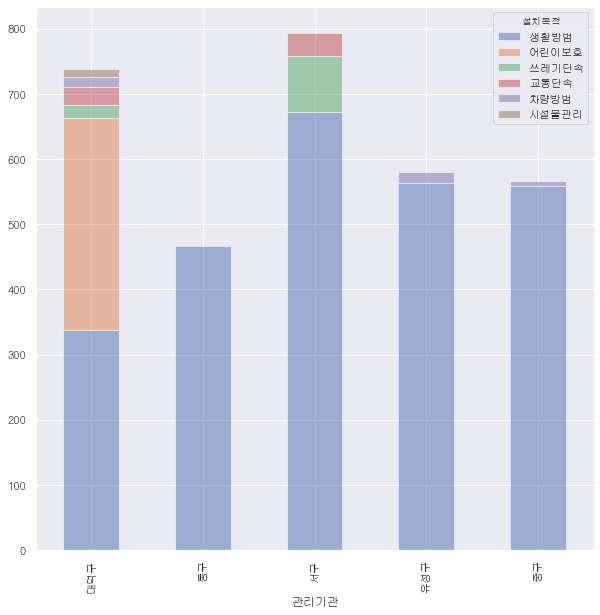

In [84]:
daejeon_cctv_설치목적.plot.bar( stacked = True, alpha = 0.5, figsize = ( 10, 10 ) )

In [93]:
#geo_path = 'skorea_geo_simple_daejeon.json'
geo_path = 'daejeon.json'
geo_str = json.load( open( geo_path, encoding = 'utf-8' ) )

### 대전시 구별 지도 시각화

In [94]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '생활방범' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '생활방범' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

### 설치 목적별 지도 시각화

In [95]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_생활방범[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_생활방범[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    

map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '생활방범' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '생활방범' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

In [96]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_어린이보호[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_어린이보호[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    
map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '어린이보호' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '어린이보호' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

In [97]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_쓰레기단속[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_쓰레기단속[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    
map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '쓰레기단속' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '쓰레기단속' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

In [98]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_교통단속[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_교통단속[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    
map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '교통단속' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '교통단속' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

In [99]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_차량방범[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_차량방범[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    
map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '차량방범' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '차량방범' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

In [100]:
map = folium.Map( location = [ 36.340, 127.395 ], zoom_start = 11 )

lats = []
lngs = []
for n in daejeon_cctv_시설물관리[ '위도' ]:
    lats.append( n )

for n in daejeon_cctv_시설물관리[ '경도' ]:
    lngs.append( n )
    
for lat, lng in zip( lats, lngs ):
    folium.Marker( [ lat, lng ] ).add_to( map )
    
map.choropleth( geo_data = geo_str, data = daejeon_cctv_설치목적[ '시설물관리' ],
                columns = [ daejeon_cctv_설치목적.index, daejeon_cctv_설치목적[ '시설물관리' ] ],
                fill_color = 'YlGn', key_on = 'feature.id' )
map

# 분석 결과

### * 대전시 CCTV는 생활방범 목적의 설치수가 많았습니다. 
### * 대전시 5개구 중에서 서구가 생활방범 CCTV수가 가장 많이 설치되어 있습니다.
### * 어린이보호를 위한 CCTV는 대덕구에만 주로 설치되어 있으며 공단과 주택가가 많은 관계가 있는것 같으나, 다른 구에도 설치가 필요합니다.
### * 쓰레기 단속은 대덕구와 서구에 주로 설치되어 있는 점으로 아파트 단지보다는 주택가가 많은것이 이유가 아닌가 생각됩니다.
### * 교통 단속은 대덕구와 서구 위주로 설치된 점으로 봐서는 주택가와 차량 운행이 많은 점이 설치 이유로 추정됩니다.
### * 차량 벙범은 대덕구와 유성구, 중구에 주로 설치된 점으로 봐서는 업무시설이 많은것으로 추정됩니다.
### * 시설물 관리는 대덕구에만 설치되어 있는데 구청에서 특별히 관리하여야 하는 시설이 있는지는 의문이 듭니다.
### * 반드시 그렇지는 않겠지만 대덕구가 다른구에 비해 생활방법 CCTV수가 적은것을 볼 때 범죄 발생율이 낮은것으로 추정됩니다.

### * 구별 인구, 학생수, 학교수, 교통사고, 생활 과태료, 범죄율등과 비교 분석을 하지 못한점이 이번 분석에서 부족한 점인것 같습니다.